In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
ts = pd.read_csv("TATASTEEL.csv")
ts.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,TISCO,EQ,142.35,148.00,153.2,146.10,152.50,152.45,150.92,2003185,3.023164e+13,NaN,NaN,NaN
1,2000-01-04,TISCO,EQ,152.45,150.10,153.0,143.05,151.95,150.80,151.03,1555136,2.348785e+13,NaN,NaN,NaN
2,2000-01-05,TISCO,EQ,150.80,144.60,162.9,144.60,158.00,156.55,156.85,3840284,6.023364e+13,NaN,NaN,NaN
3,2000-01-06,TISCO,EQ,156.55,158.95,169.1,158.95,169.00,168.25,167.61,2560449,4.291530e+13,NaN,NaN,NaN
4,2000-01-07,TISCO,EQ,168.25,173.40,179.0,166.30,170.55,171.95,173.89,3641691,6.332459e+13,NaN,NaN,NaN


In [3]:
ts.Date = pd.to_datetime(ts.Date) 
ts.index = ts.Date
ts = ts['High']

In [4]:
train,test = ts['2010-01-01':'2016-06-06'],ts['2016-06-06':'2017-06-06']


In [5]:
diff_train = train - train.shift()
diff_train = diff_train.dropna()
diff_test = (test - test.shift()).dropna()

In [6]:
# plt.plot(diff_train)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

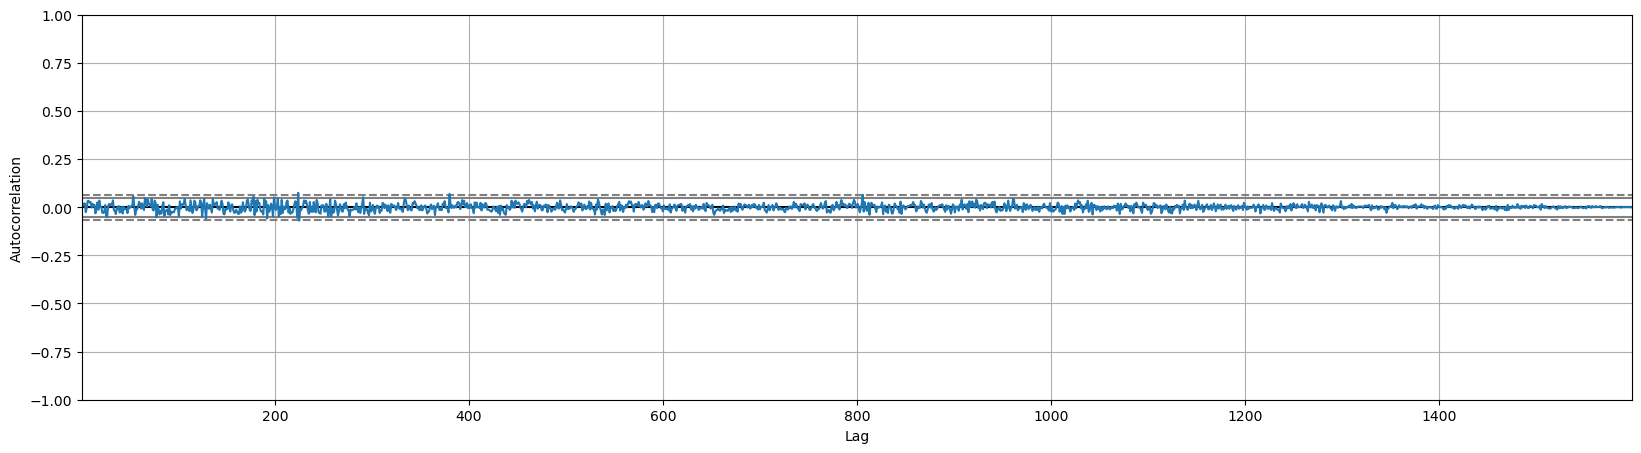

In [7]:
from pandas.plotting import autocorrelation_plot
plt.figure(figsize = (20,5))
autocorrelation_plot(diff_train)

<Figure size 2000x500 with 0 Axes>

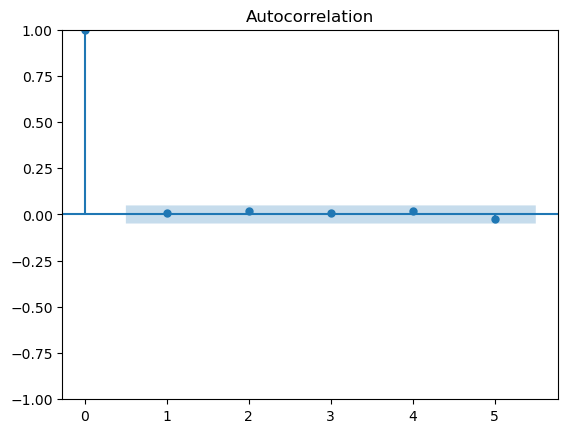

In [8]:
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize = (20,5))
plot_acf(diff_train,lags = 5)
plt.show()

<Figure size 2000x500 with 0 Axes>

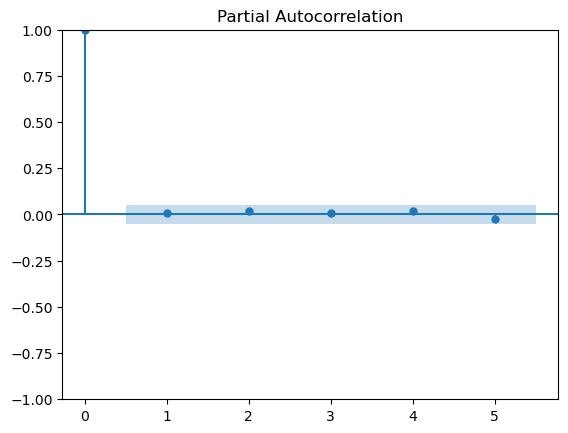

In [9]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize = (20,5))
plot_pacf(diff_train,lags = 5)
plt.show()

In [10]:
import statsmodels.api as sm

In [11]:
model = sm.tsa.arima.ARIMA(diff_train,order = (12,2,3)).fit()
# 6 2 1   5 3 4   8 2 3   10 2 3  0 2 2
# 0 2 2   5 1 0   5 2 2  610  6 2 1  710  7 2 1  8 2 2             12 2 3

C:\Users\vidit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\vidit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\vidit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\vidit\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [12]:
# plt.figure(figsize = (20,5))
# plt.plot(model.fittedvalues,c = 'r')
# plt.plot(diff_train,c = 'b')

In [13]:
s = len(train)
e = len(train) + len(test) - 1
diff_predict = model.predict(start = s,end = e,typ = 'levels')

C:\Users\vidit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [14]:
# diff_predict 

In [15]:
diff_predict.index = test.index

In [16]:
# diff_predict

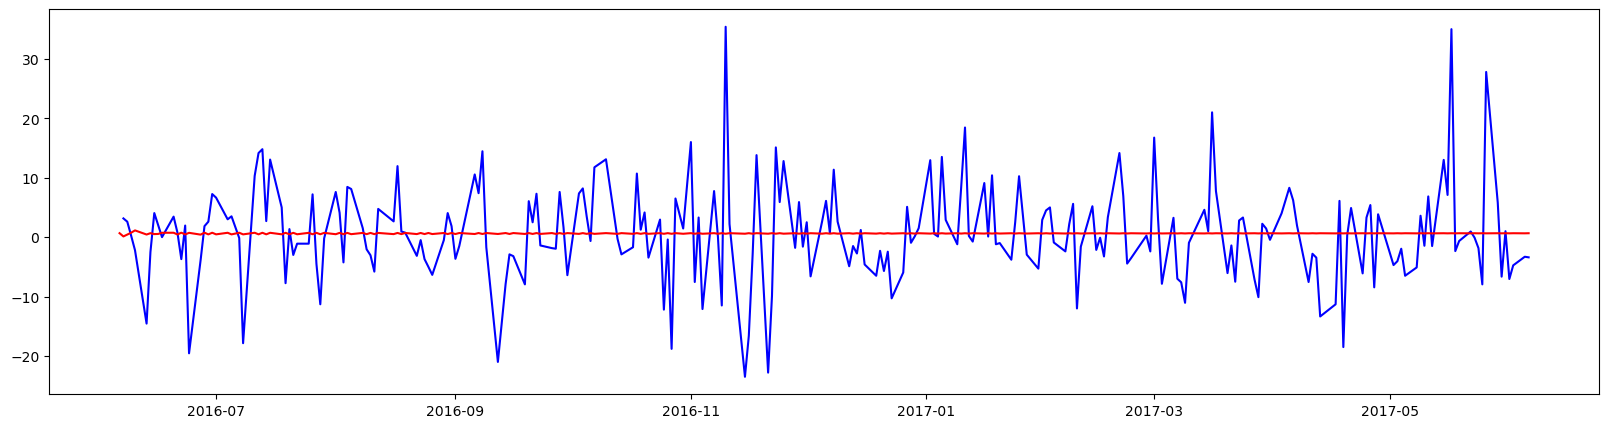

In [17]:
plt.figure(figsize = (20,5))
plt.plot(diff_test ,c ='b')
plt.plot(diff_predict,c = 'r')

In [18]:
diff_predict_cumsum  = diff_predict.cumsum()
base_series = pd.Series(test.iloc[0],index = test.index)
base_series

Date
2016-06-06    340.7
2016-06-07    340.7
2016-06-08    340.7
2016-06-09    340.7
2016-06-10    340.7
              ...  
2017-05-31    340.7
2017-06-01    340.7
2017-06-02    340.7
2017-06-05    340.7
2017-06-06    340.7
Length: 249, dtype: float64

In [19]:
final_pred = base_series.add(diff_predict_cumsum,fill_value = 0)
final_pred

Date
2016-06-06    341.364955
2016-06-07    341.483208
2016-06-08    341.913481
2016-06-09    342.656806
2016-06-10    343.791486
                 ...    
2017-05-31    493.188438
2017-06-01    493.829308
2017-06-02    494.486391
2017-06-05    495.127897
2017-06-06    495.785214
Length: 249, dtype: float64

22.570414842751507


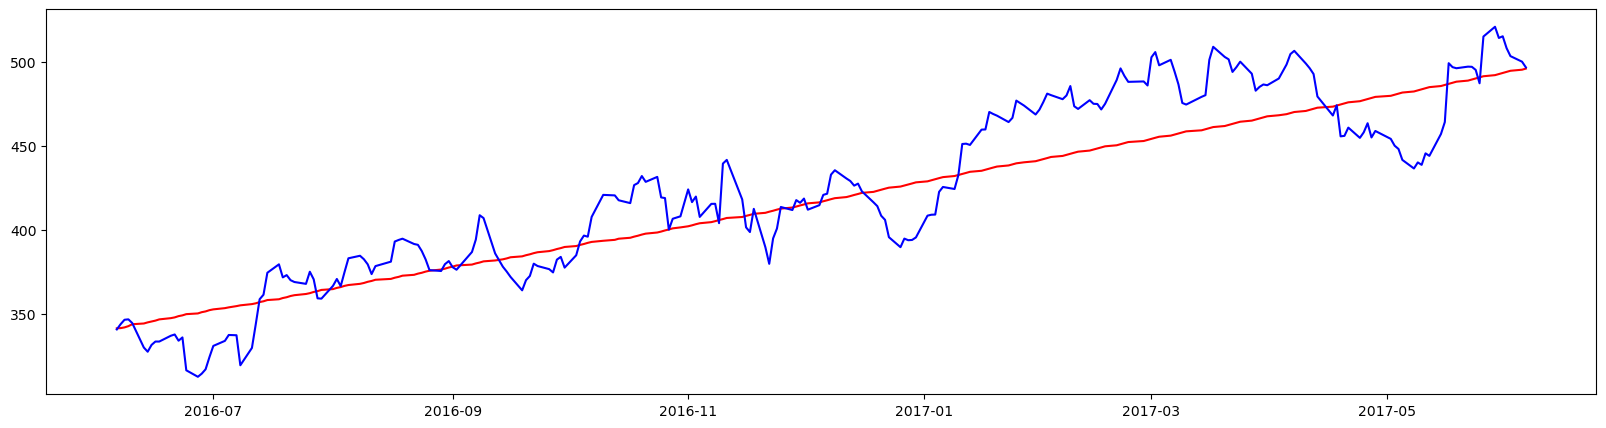

In [20]:
from math import sqrt
from sklearn import metrics
plt.figure(figsize = (20,5))
plt.plot(final_pred,c = 'r')
plt.plot(test,c = 'b')
print(sqrt(metrics.mean_squared_error(final_pred , test)))

In [21]:
# from math import sqrt
# from sklearn import metrics
# import warnings
# warnings.filterwarnings('ignore')
# for p  in range(10,20):
#     for d in range(3):
#         for q in range(5):
#             model = sm.tsa.arima.ARIMA(diff_train,order = (p,d,q)).fit()
#             diff_predict = model.predict(start = s,end = e,typ = 'levels')
#             diff_predict.index = test.index
#             diff_predict_cumsum  = diff_predict.cumsum()
#             base_series = pd.Series(test.iloc[0],index = test.index)
#             final_pred = base_series.add(diff_predict_cumsum,fill_value = 0)
#             print(p,d,q,sqrt(metrics.mean_squared_error(final_pred,test)))
            

In [22]:
12 2 3 22

SyntaxError: invalid syntax (958141530.py, line 1)